- Nama: Muhammad Faqih Maulana
- Email: faqhmlna@gmail.com
- Id Dicoding: faqhmlna

# Prepare

## Import Library

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Import Dataset

In [138]:
dataset = 'https://raw.githubusercontent.com/faqhmlna0/student_performance/refs/heads/main/data.csv'
sp_df = pd.read_csv(dataset, sep=';')
sp_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [139]:
sp_df.to_csv('dataset_student_performance.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'dataset_student_performance.csv'

## Data Understanding

In [ ]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
sp_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [ ]:
jumlah_duplikasi = sp_df.duplicated().sum()
print(f'Jumlah Duplikasi adalah {jumlah_duplikasi}')

Jumlah Duplikasi adalah 0


In [ ]:
sp_df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [ ]:
sp_df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
sp_df['Status'] = sp_df['Status'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\960081400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sp_df['Status'] = sp_df['Status'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})


In [ ]:
sp_df['Status'].unique()

array([0, 2, 1])

In [ ]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
sp_df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [ ]:
sp_df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,2
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


# Exploratory Data Analysis

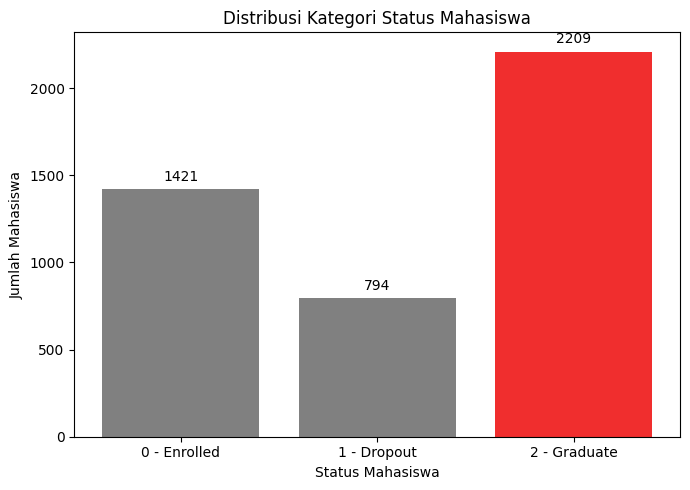

In [ ]:
# Mapping status
status_labels = {0: 'Enrolled', 1: 'Dropout', 2: 'Graduate'}

# Hitung jumlah masing-masing status
status_counts = sp_df['Status'].value_counts().sort_index()

# Warna: warna dominan (jumlah terbesar) → merah, lainnya → abu
colors = ['#f02e2e' if count == status_counts.max() else 'grey' for count in status_counts]

# Plot distribusi status mahasiswa
plt.figure(figsize=(7, 5))
bars = plt.bar(
    [f"{key} - {status_labels[key]}" for key in status_counts.index],
    status_counts.values,
    color=colors
)

# Tambahkan label angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 30, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.title("Distribusi Kategori Status Mahasiswa")
plt.xlabel("Status Mahasiswa")
plt.ylabel("Jumlah Mahasiswa")
plt.tight_layout()
plt.show()


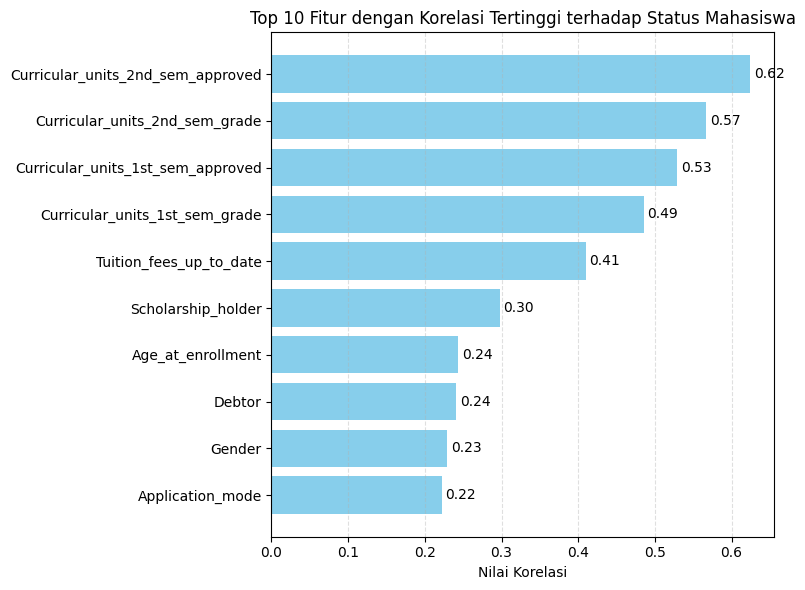

In [ ]:
# Ambil 10 fitur teratas dengan korelasi absolut tertinggi terhadap 'Status'
top_corr = sp_df.corr()['Status'].drop('Status').abs().nlargest(10)

plt.figure(figsize=(8, 6))
bars = plt.barh(top_corr.index[::-1], top_corr.values[::-1], color='skyblue')  # Dibalik biar urutan top → bottom

for i, v in enumerate(top_corr.values[::-1]):
    plt.text(v + 0.005, i, f'{v:.2f}', va='center')

plt.xlabel('Nilai Korelasi')
plt.title('Top 10 Fitur dengan Korelasi Tertinggi terhadap Status Mahasiswa')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\2214314536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sp_df, x='Status', y='Curricular_units_2nd_sem_grade', palette='pastel')


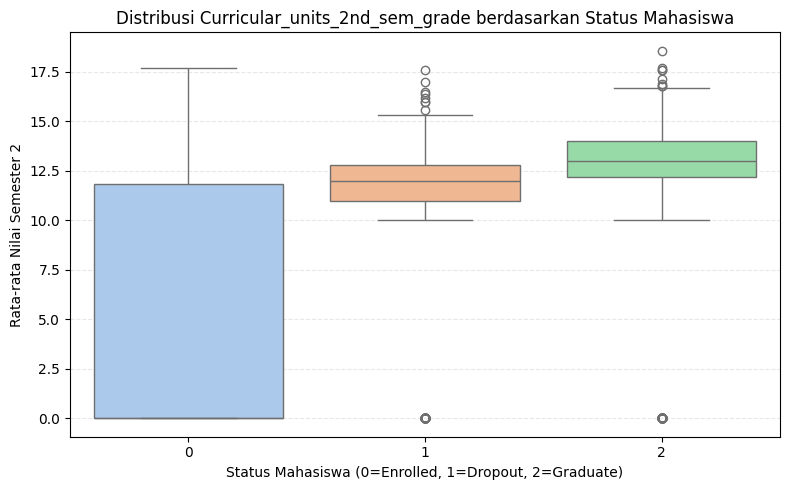

In [ ]:
# EDA untuk fitur: Curricular_units_2nd_sem_grade vs Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=sp_df, x='Status', y='Curricular_units_2nd_sem_grade', palette='pastel')
plt.title('Distribusi Curricular_units_2nd_sem_grade berdasarkan Status Mahasiswa')
plt.xlabel('Status Mahasiswa (0=Enrolled, 1=Dropout, 2=Graduate)')
plt.ylabel('Rata-rata Nilai Semester 2')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\1169401918.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sp_df, x='Status', y=feature, palette='pastel')


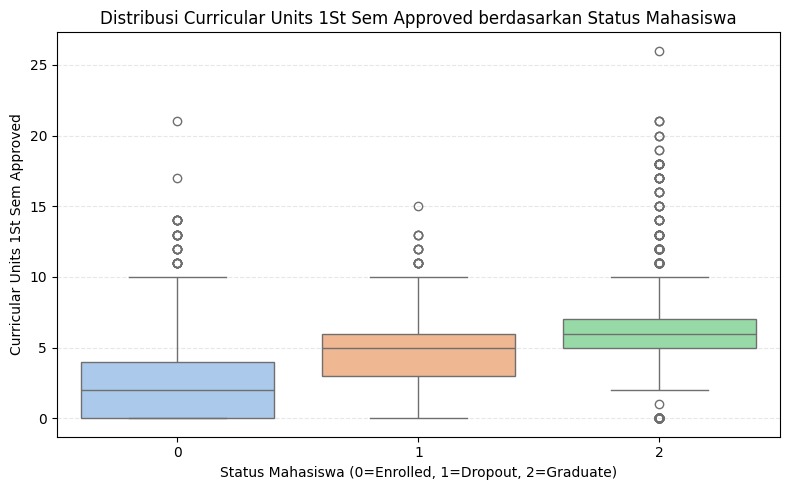

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\1169401918.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sp_df, x='Status', y=feature, palette='pastel')


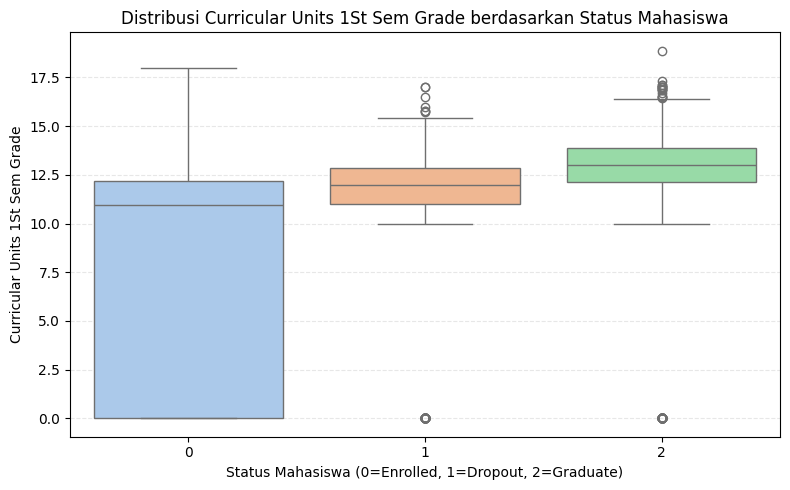

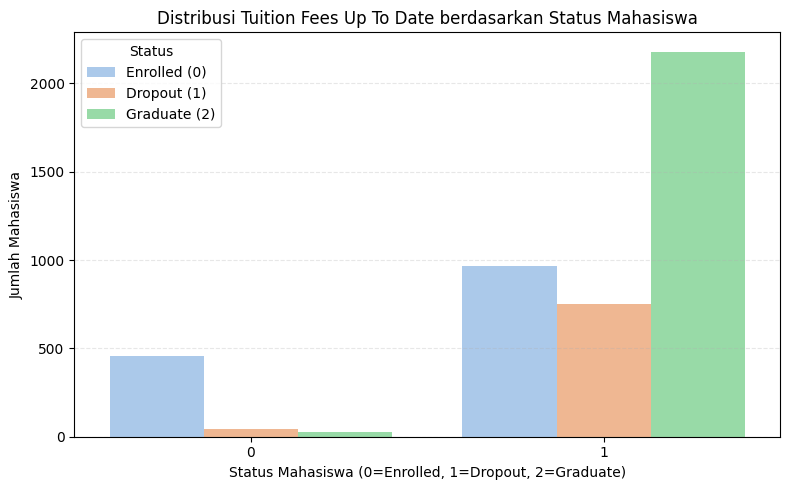

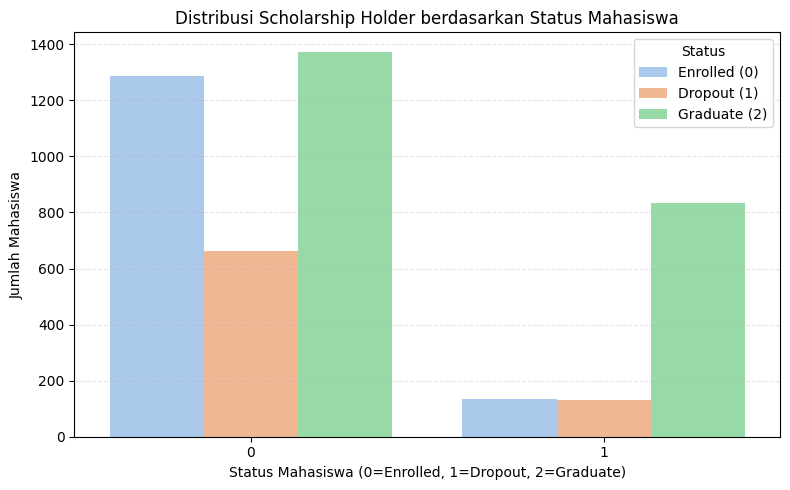

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\1169401918.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sp_df, x='Status', y=feature, palette='pastel')


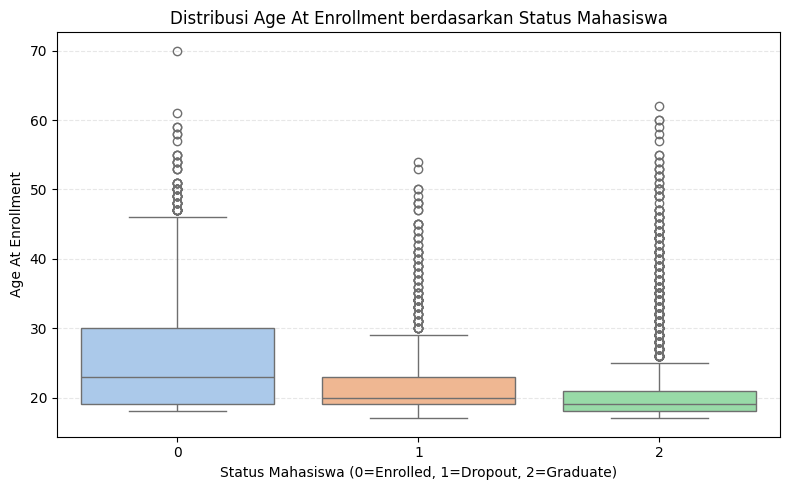

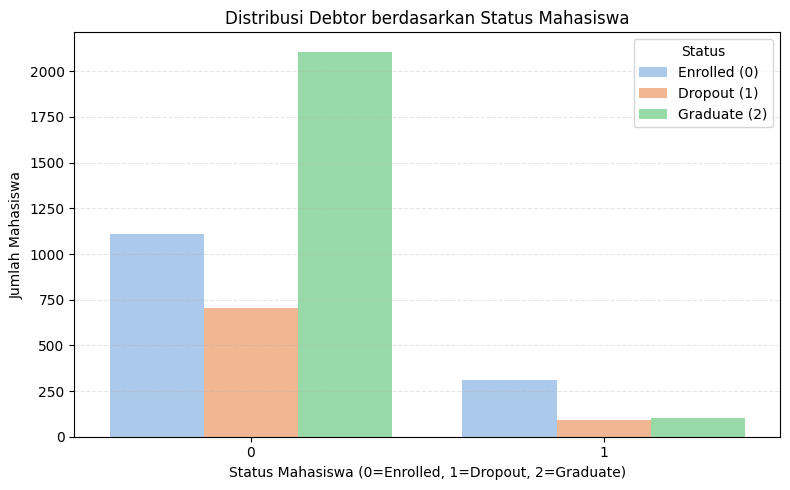

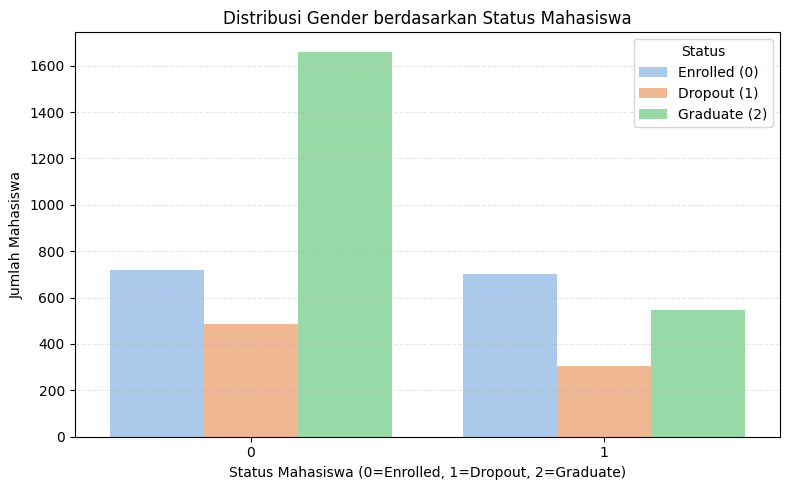

C:\Users\faqih\AppData\Local\Temp\ipykernel_43908\1169401918.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sp_df, x='Status', y=feature, palette='pastel')


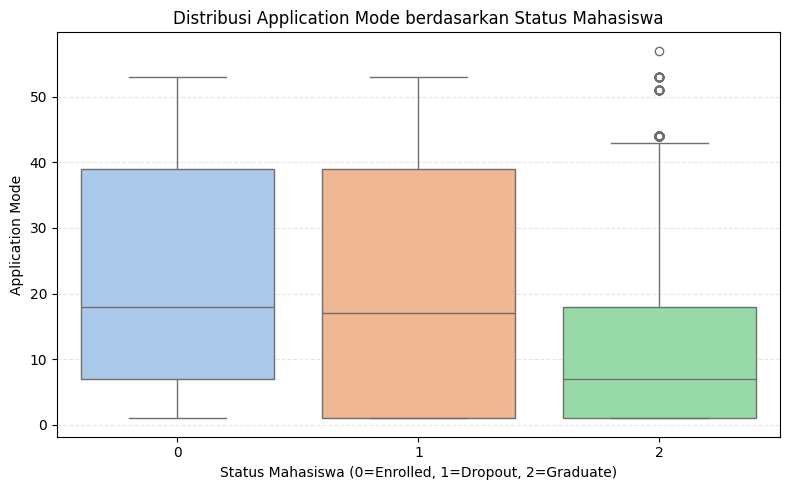

In [ ]:
# Features
features_for_eda = [
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Age_at_enrollment',
    'Debtor',
    'Gender',
    'Application_mode'
]

for feature in features_for_eda:
    plt.figure(figsize=(8, 5))
    if sp_df[feature].nunique() <= 10 and sp_df[feature].dtype in ['int64', 'object']:
        sns.countplot(data=sp_df, x=feature, hue='Status', palette='pastel')
        plt.legend(title='Status', labels=['Enrolled (0)', 'Dropout (1)', 'Graduate (2)'])
        plt.ylabel('Jumlah Mahasiswa')
    else:
        sns.boxplot(data=sp_df, x='Status', y=feature, palette='pastel')
        plt.ylabel(feature.replace('_', ' ').title())

    plt.title(f'Distribusi {feature.replace("_", " ").title()} berdasarkan Status Mahasiswa')
    plt.xlabel('Status Mahasiswa (0=Enrolled, 1=Dropout, 2=Graduate)')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
df = sp_df.drop(columns=['Unemployment_rate', 'Inflation_rate', 'GDP',
                                'International', 'Nacionality', 'Educational_special_needs'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Mothers_qualification                         4424 non-null   int64  
 8   Fathers_qualification                         4424 non-null   int64  
 9   Mothers_occupation                            4424 non-null   i

# Data Preparation / Preprocessing

In [ ]:
df_model = df.copy()
df_model = df_model.drop(columns=['Daytime_evening_attendance',
                          'Curricular_units_2nd_sem_evaluations',
                          'Fathers_occupation', 'Mothers_occupation',
                          'Fathers_qualification', 'Mothers_qualification',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Application_mode',
                          'Application_order', 'Course',
                          'Previous_qualification', 'Admission_grade',
                          'Previous_qualification_grade'], axis=1)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marital_status                     4424 non-null   int64  
 1   Displaced                          4424 non-null   int64  
 2   Debtor                             4424 non-null   int64  
 3   Tuition_fees_up_to_date            4424 non-null   int64  
 4   Gender                             4424 non-null   int64  
 5   Scholarship_holder                 4424 non-null   int64  
 6   Age_at_enrollment                  4424 non-null   int64  
 7   Curricular_units_1st_sem_credited  4424 non-null   int64  
 8   Curricular_units_1st_sem_enrolled  4424 non-null   int64  
 9   Curricular_units_1st_sem_approved  4424 non-null   int64  
 10  Curricular_units_1st_sem_grade     4424 non-null   float64
 11  Curricular_units_2nd_sem_credited  4424 non-null   int64

In [ ]:
df_model['dropout'] = df_model['Status'].map(lambda x: 1 if x == 0 else 0)
df_model.drop(['Status'], axis=1, inplace=True)
df_model['dropout']

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: dropout, Length: 4424, dtype: int64

In [ ]:
# Pisahkan fitur dan target
X = df_model.drop('dropout', axis=1)
y = df_model['dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train)
X_train=pd.DataFrame(minmaxscaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(minmaxscaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 15)
(885, 15)
(3539,)
(885,)


# Modeling

In [ ]:
models={'LogisticRegression()':LogisticRegression(),
        'Random Forest':RandomForestClassifier(),
        'Gradient Boosting':GradientBoostingClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

LogisticRegression()
0.8892655367231639
Random Forest
0.8847457627118644
Gradient Boosting
0.8870056497175142
K-Nearest Neighbors
0.8666666666666667
Naive Bayes
0.8598870056497175


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Evaluation

In [ ]:
accuracy_score(y_test, pred)

0.8892655367231639

In [ ]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[566,  42],
       [ 56, 221]])

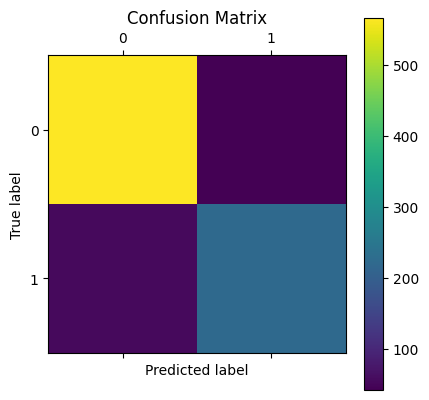

In [ ]:
matrix = confusion_matrix(y_test, pred)
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Model Deployment

In [ ]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)